# **Calculating the workspace of a robot**

นายกีรติ ยุบลมาตย์ 65340500003

วิธีคิด
1. หา Modified DH-Parameters
2. คำนวณ Workspace

In [1]:
import roboticstoolbox as rtb
import numpy as np

from spatialmath import SE3
from math import pi,atan2

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 1. Modified DH-Parameters

จากโมเดลสามารถ หา MDH parameters ได้ดังนี้

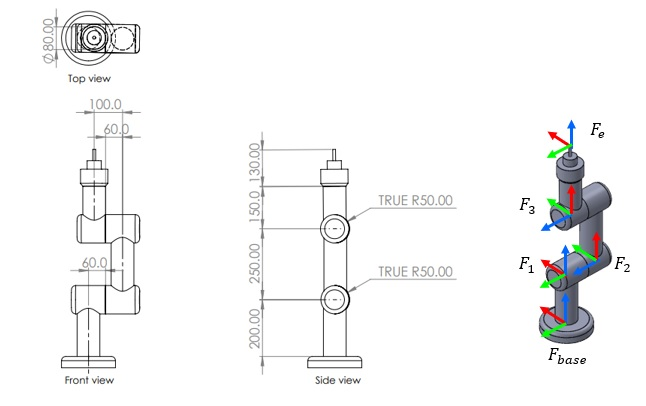

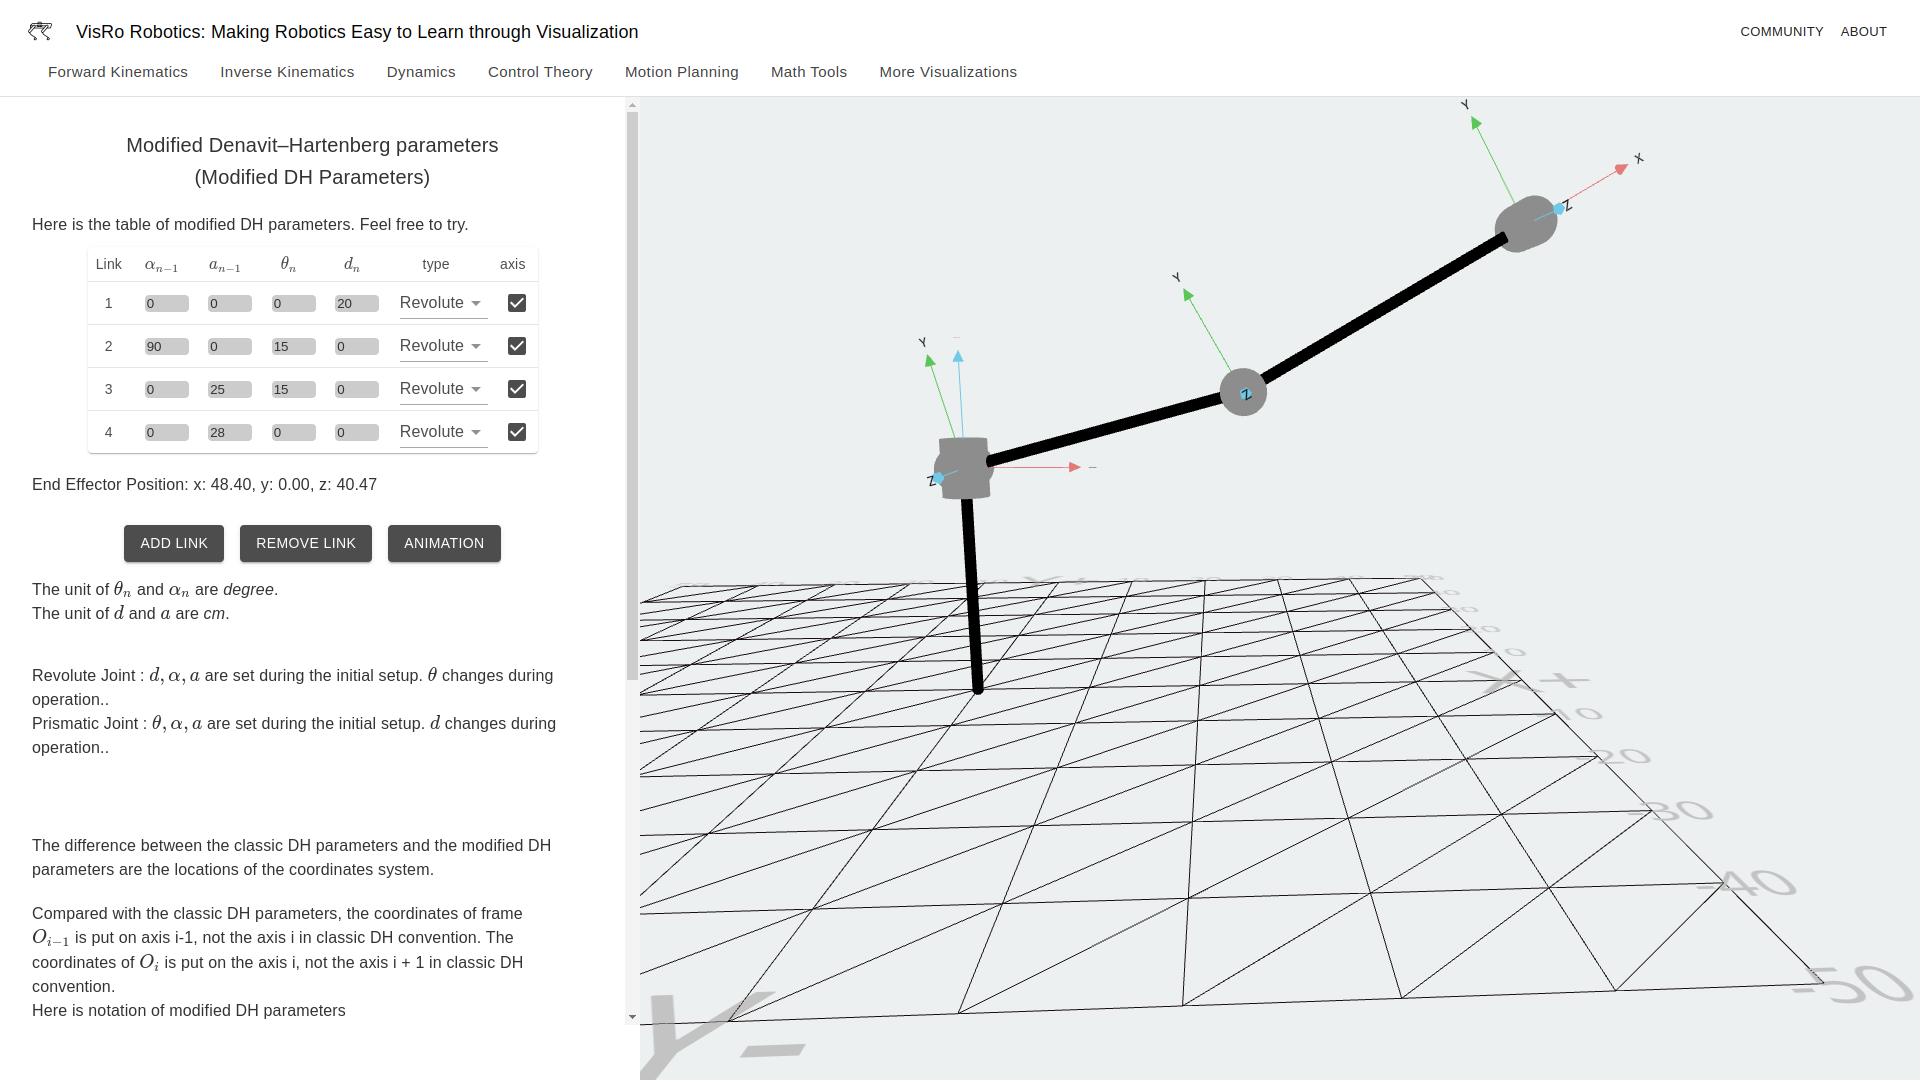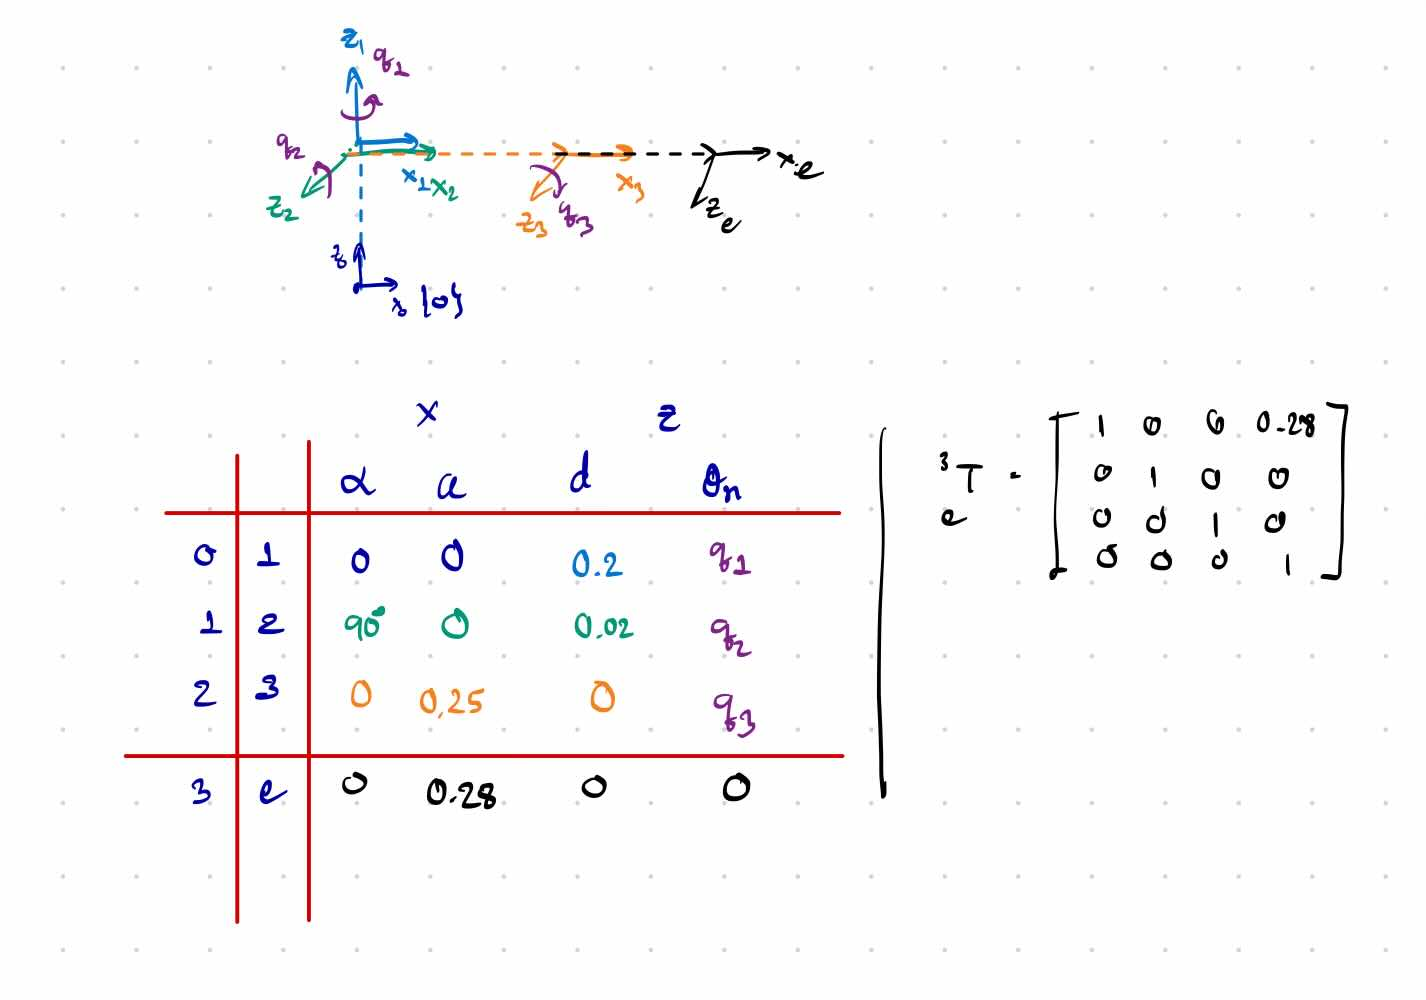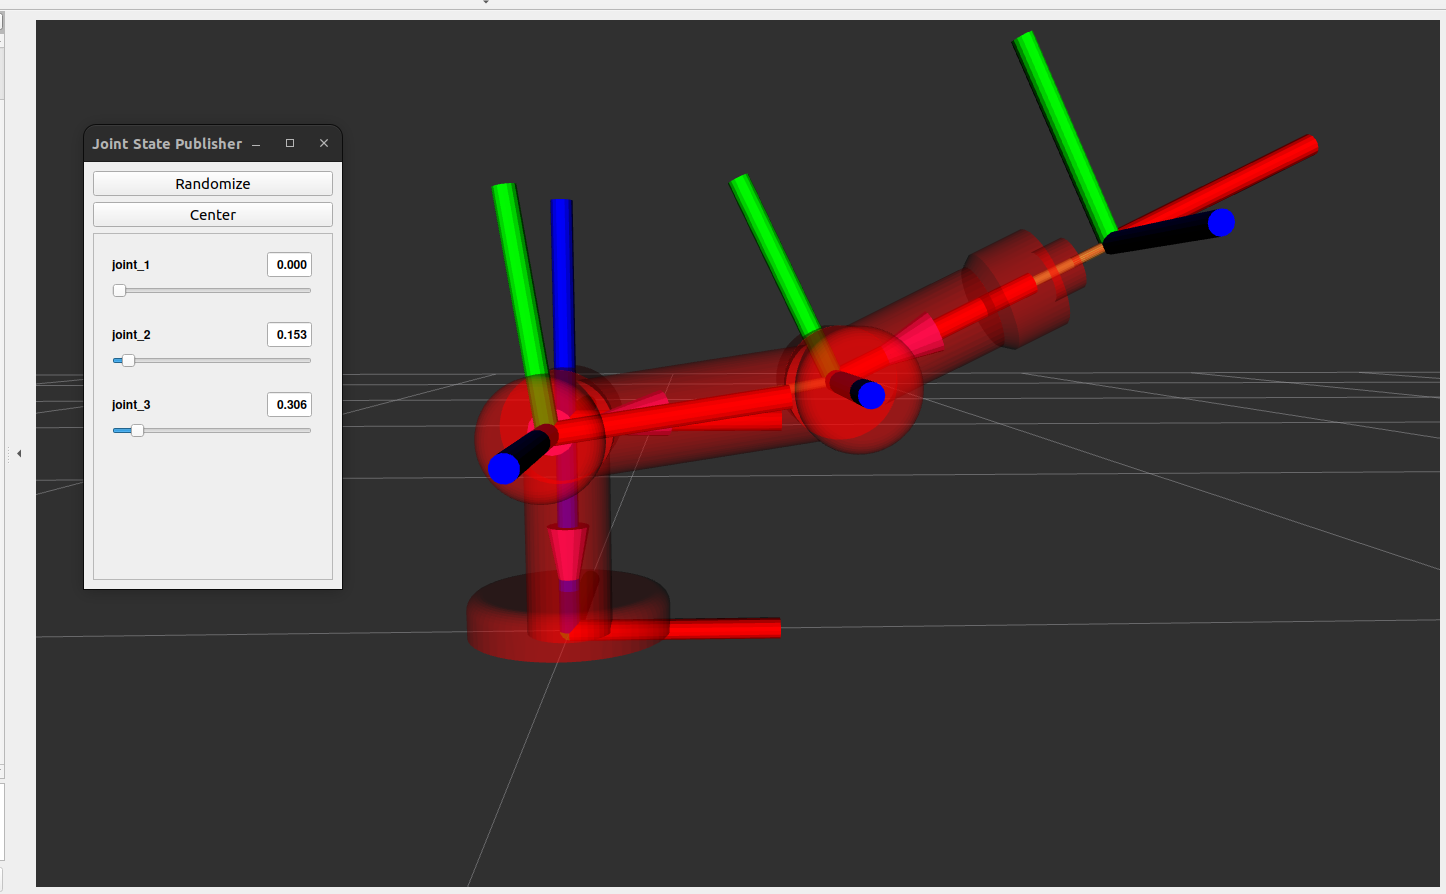

In [2]:


robot = rtb.DHRobot(
    [
        rtb.RevoluteMDH(alpha = 0.0     ,a = 0.0      ,d = 0.2      ,offset = 0.0),
        rtb.RevoluteMDH(alpha = pi/2   ,a = 0.0      ,d = 0.02       ,offset = 0.0),
        rtb.RevoluteMDH(alpha = 0     ,a = 0.25       ,d = 0.0      ,offset = 0.0),

    ],tool = SE3.Tx(0.28),
    name = "RRR_Robot"
)

print(robot)

DHRobot: RRR_Robot, 3 joints (RRR), dynamics, modified DH parameters
┌──────┬───────┬─────┬──────┐
│ aⱼ₋₁ │ ⍺ⱼ₋₁  │ θⱼ  │  dⱼ  │
├──────┼───────┼─────┼──────┤
│  0.0 │  0.0° │  q1 │  0.2 │
│  0.0 │ 90.0° │  q2 │ 0.02 │
│ 0.25 │  0.0° │  q3 │  0.0 │
└──────┴───────┴─────┴──────┘

┌──────┬──────────────────────────────────────┐
│ tool │ t = 0.28, 0, 0; rpy/xyz = 0°, 0°, 0° │
└──────┴──────────────────────────────────────┘



##### 1.2. จงแสดงให้เห็นว่า MDH-Parameter ที่หามาสามารถแสดง Kinematic ของหุ่นยนต์ได้

[0, 1.5707963267948966, 0]
   0        -1         0         0         
   0         0        -1        -0.02      
   1         0         0         0.73      
   0         0         0         1         



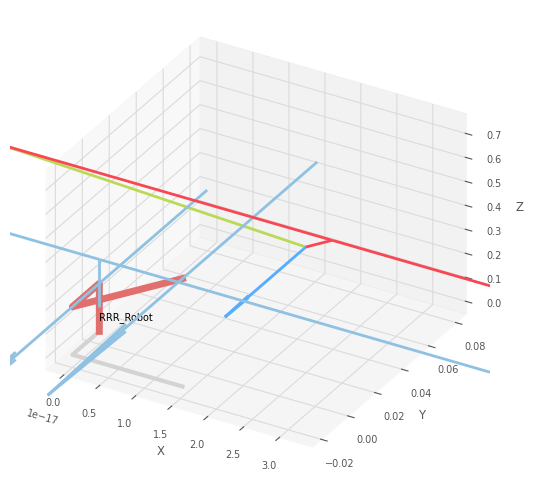

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'RRR_Robot')

<Figure size 640x480 with 0 Axes>

In [3]:
q = [0, pi/2,0]
# q = [0,0,0]
T_0e = robot.fkine(q)
print(q)
print(T_0e)
robot.plot(q=q)

## 2. Forward Kinematics

##### 2.1. จงหา POSE ของเฟรม {e} เมื่อกำหนดให้ [$q_1$, $q_2$, $q_3$, $q_4$, $q_5$, $q_6$] เท่ากับ 45, 30, 60, 30, 90, และ 270 องศา ตามลำดับ

[0, 0.2617993877991494, 0.2617993877991494]
   0.866    -0.5       0         0.484     
   0         0        -1        -0.02      
   0.5       0.866     0         0.4047    
   0         0         0         1         



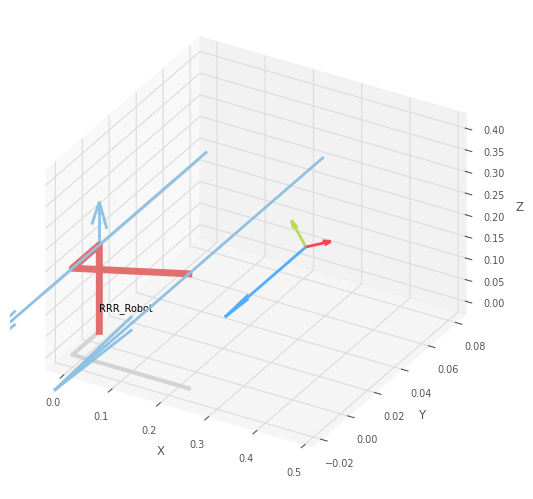

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'RRR_Robot')

<Figure size 640x480 with 0 Axes>

In [4]:
q = [0, pi/12, pi/12]
T_0e = robot.fkine(q)
print(q)
print(T_0e)
robot.plot(q=q)

##### 2.2. จงแสดงให้เห็นว่าคำตอบข้อที่ตอบมาในข้อที่ 2.1. เป็นคำตอบที่ถูกต้อง

In [5]:
print(T_0e)

   0.866    -0.5       0         0.484     
   0         0        -1        -0.02      
   0.5       0.866     0         0.4047    
   0         0         0         1         



Solution 1 matches the joint angles
Joint 1: FK input = 0, IK solution = -1.548066900447509e-06
Joint 2: FK input = 0.2617993877991494, IK solution = 0.26182176316466776
Joint 3: FK input = 0.2617993877991494, IK solution = 0.26178136151986475
FK verified: Joint angles match within tolerance.

Plotting FK input:


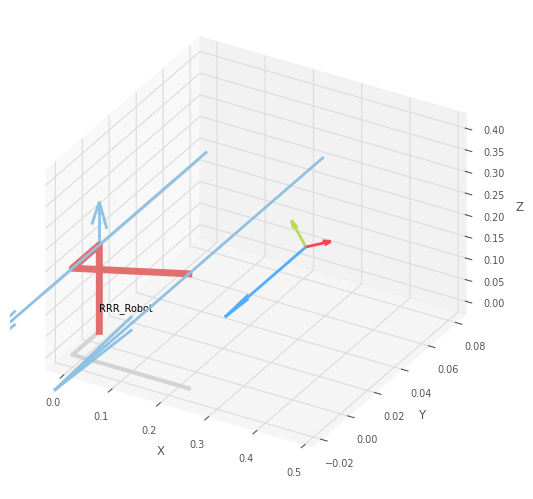

Plotting IK solution:


<Figure size 640x480 with 0 Axes>

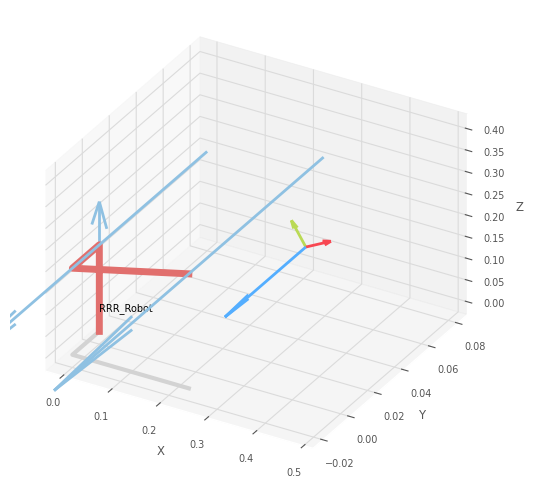

<Figure size 640x480 with 0 Axes>

In [6]:
solutions = []
for i in range(500):
    q_, success, error, x, x = robot.ik_LM(Tep=T_0e)
    if not any(np.allclose(q, s, atol=0.1) for s in solutions):
        solutions.append(q_)

for i, sol in enumerate(solutions):
    if np.allclose(q, sol, atol=0.1):
        print(f"Solution {i+1} matches the joint angles")
        for j, (q_val, sol_val) in enumerate(zip(q, sol)):
            print(f"Joint {j+1}: FK input = {q_val}, IK solution = {sol_val}")
        print("FK verified: Joint angles match within tolerance.\n")

        print("Plotting FK input:")
        robot.plot(q)
        print("Plotting IK solution:")
        robot.plot(sol)
        break


## 3. Inverse Kinematics

##### 3.1. หากต้องการควบคุมให้ End-effector ไปอยู่ที่ตำแหน่ง x = 511 mm, y = 684 mm, z = 926 mm โดยมี roll = 30°, pitch = 45°, yaw = 60° (Fixed Axis X-Y-Z) จะมีวิธีการที่สามารถหมุนข้อต่อให้ End-effector อยู่ในท่าทางดังกล่าวได้กี่วิธี เพราะอะไร

##### 3.2. การจะควบคุมให้ End-effector อยู่ในท่าทางดังกล่าวต้องหมุนแต่ละข้อต่ออย่างไรบ้าง 

หุ่นยนต์รูปแบบนี้มีชื่อว่า UR5 ที่มี 6 ข้อต่อ จะมีท่าท่าที่ได้หาได้จาก inverse kinematic อยู่ทั้งหมด 8 ท่าที่แตกต่างกันดังนี้
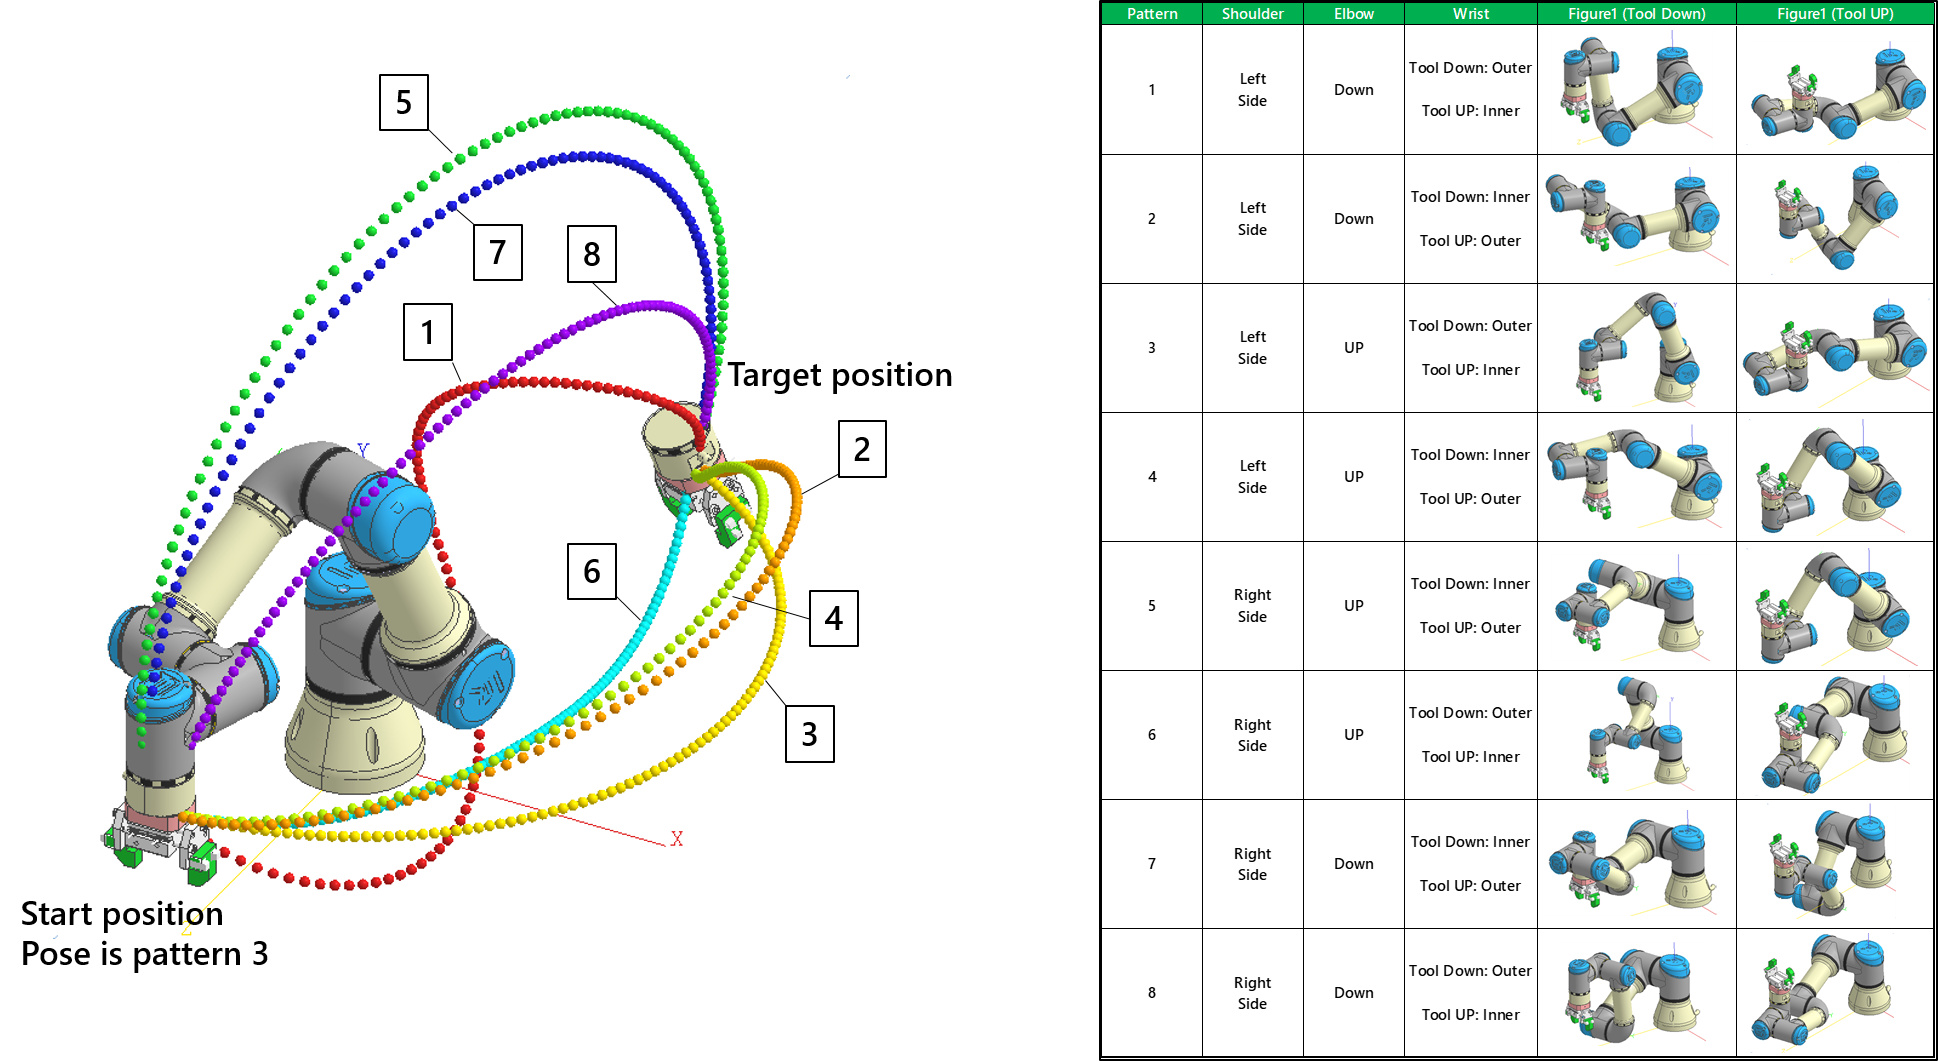

โดยแต่ละท่าทางจะมีความแตกต่างกันดังนี้
1. ตำแหน่งของข้อศอกสามารถอยู่ในตำแหน่ง "elbow-up" หรือ "elbow-down" ได้
2. ข้อต่อที่เป็นไหล่และศอกสามารถหมุนได้ในทิศทางบวกหรือลบ ทำให้มีหลายทางในการไปถึงจุดเดียวกัน
3. การหมุนข้อต่อแบบข้อมือสามารถหมุนในทิศทางที่แตกต่างกันแต่ตำแหน่งปลายทางอยู่จุดเดียวกันได้
4. การหมุนข้อต่อที่เป็นไหล่สามารถหมุนในทิศทางไปข้างหน้าหรือข้างหลัง

[ 0.0950022  -2.18395112 -1.86744261]


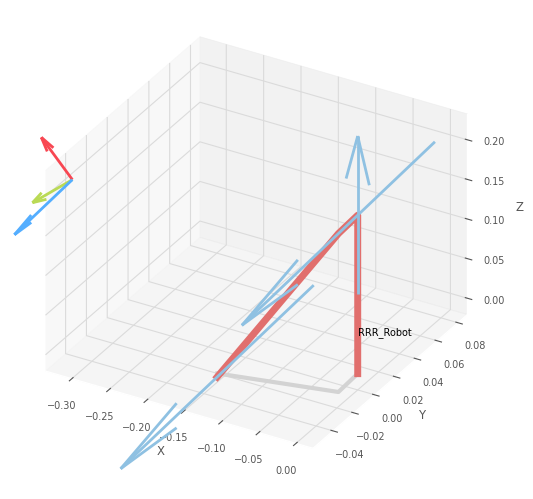

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'RRR_Robot')

<Figure size 640x480 with 0 Axes>

In [7]:
# กำหนดค่าตัวอย่าง
x = 0.484
y = 0.0
z = 0.4047
roll = 0
pitch = 0
yaw = 0

ikT_0e = SE3(x,y,z) @ SE3.RPY(roll, pitch, yaw)

#q_sol = robot.ik_LM(ikT_0e)
q_sol = robot.ik_LM(ikT_0e, q0=[0, np.nan, 0])
print(q_sol[0])
robot.plot(q_sol[0])


จากวิธีหา Inverse Kinematic แบบ numberic สามารถหาค่าโพสไดมากกว่า 1 ท่าจึงทำการลูปเพื่อหาท่าทางทั้งหมดที่สามารถเกิดได้จากหุ่นดังนี้

Solution 1: [-1.65542427  1.04188945 -0.83702838]


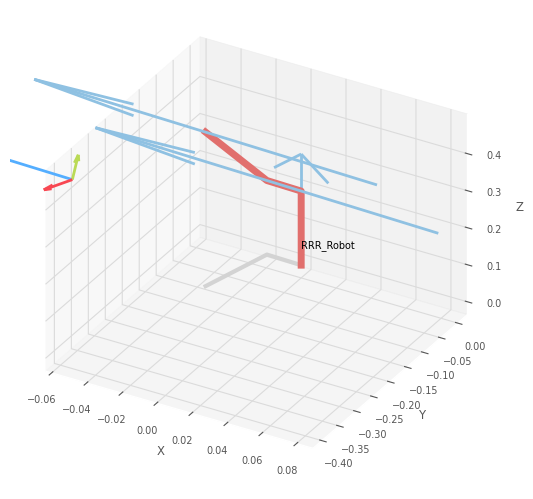

Solution 2: [ 2.9334206  -1.96932508  2.3120695 ]


<Figure size 640x480 with 0 Axes>

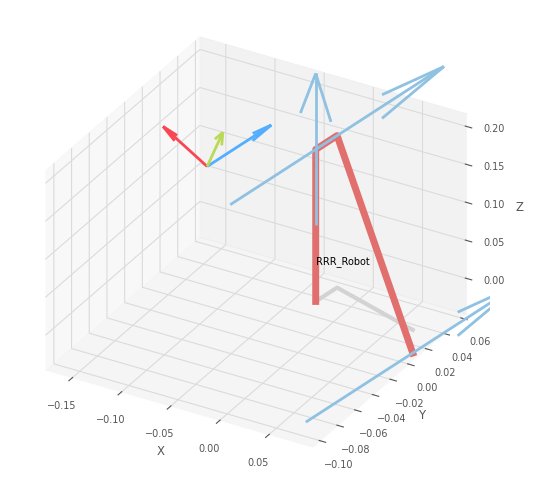

Solution 3: [ 2.28639405  1.81729175 -0.07555047]


<Figure size 640x480 with 0 Axes>

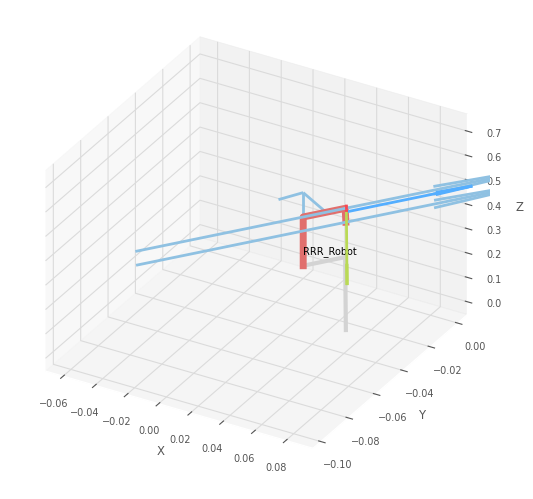

Solution 4: [-2.55495767 -2.95913203 -2.88811202]


<Figure size 640x480 with 0 Axes>

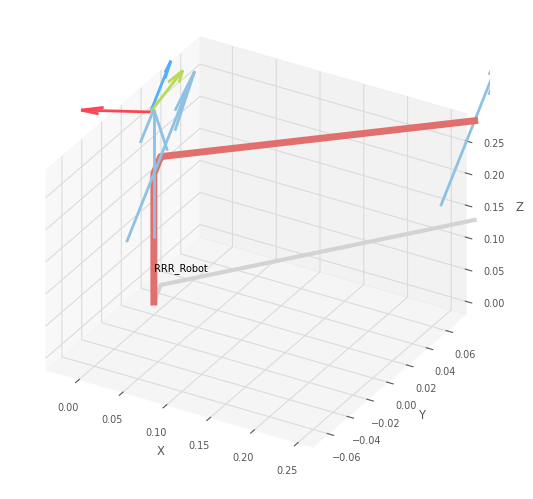

Solution 5: [-0.97074622 -1.26764791  0.09949487]


<Figure size 640x480 with 0 Axes>

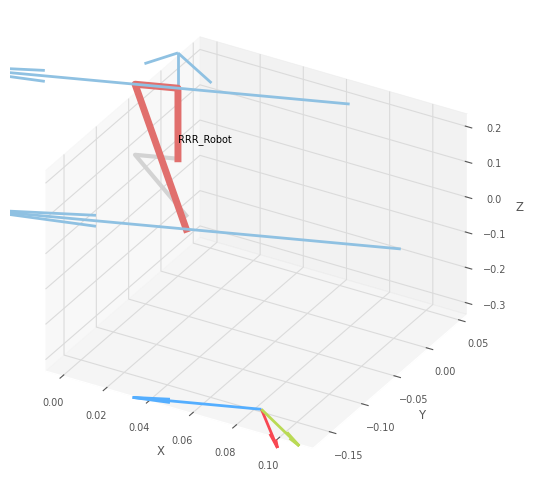

Solution 6: [ 0.20953451 -1.6141115   0.33767461]


<Figure size 640x480 with 0 Axes>

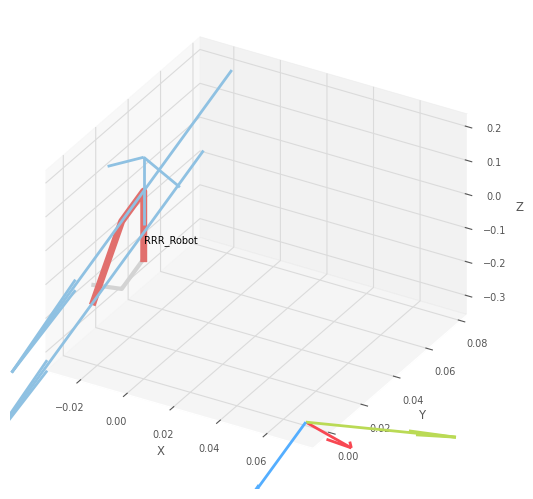

Solution 7: [-0.6427901  -0.92240531 -1.94959156]


<Figure size 640x480 with 0 Axes>

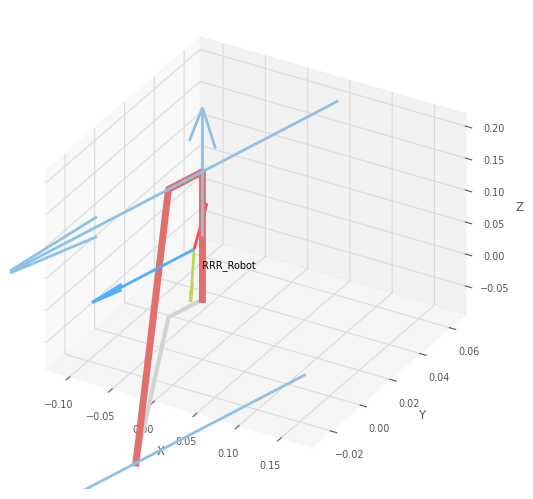

Solution 8: [ 1.07946522 -0.91210389  0.53314602]


<Figure size 640x480 with 0 Axes>

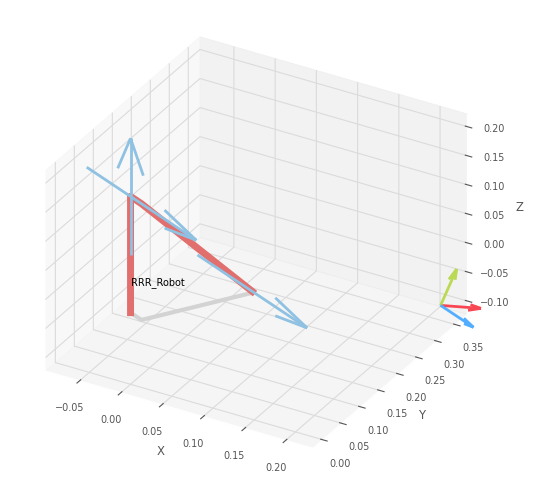

Solution 9: [-2.59398867 -2.24808352  2.47807882]


<Figure size 640x480 with 0 Axes>

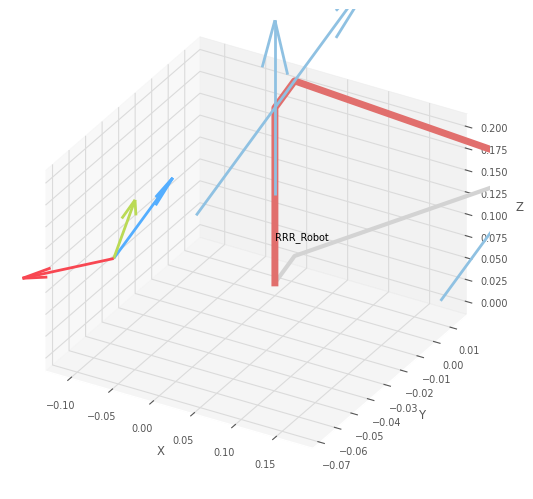

Solution 10: [-0.23259613 -2.19990794  0.36670651]


<Figure size 640x480 with 0 Axes>

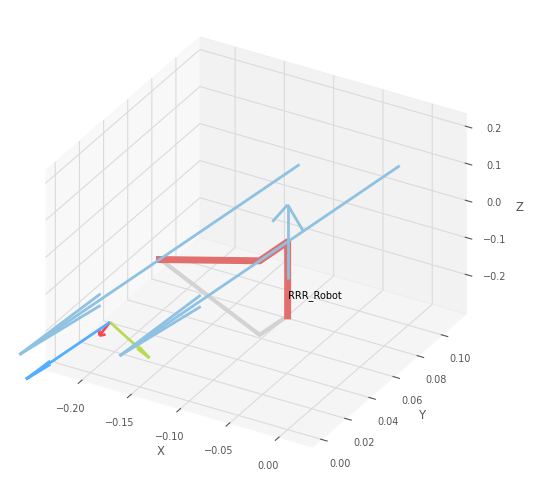

Solution 11: [-2.01569887  2.81646072  2.40160376]


<Figure size 640x480 with 0 Axes>

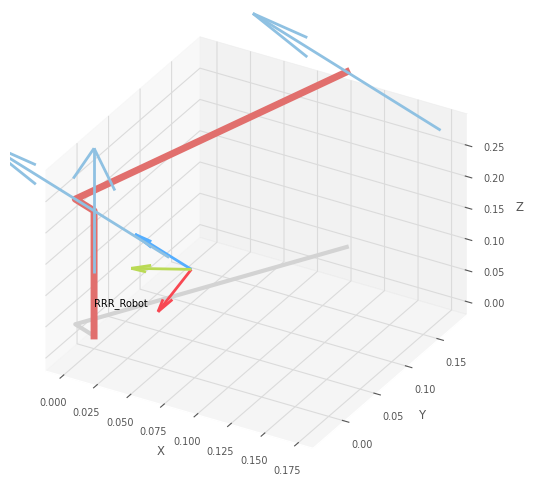

Solution 12: [-3.12762146 -2.71877536  2.14135811]


<Figure size 640x480 with 0 Axes>

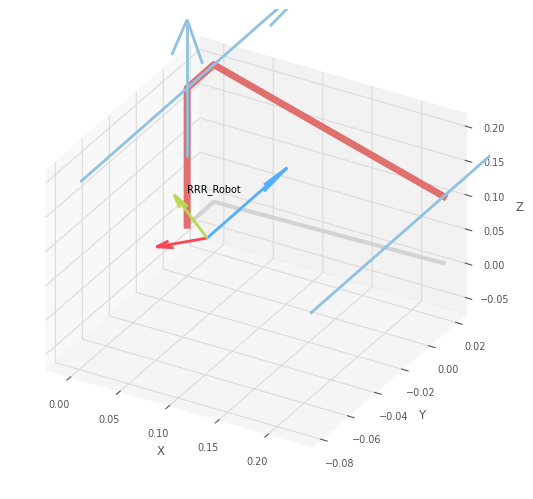

Solution 13: [-2.91582881  2.04305002 -2.02146717]


<Figure size 640x480 with 0 Axes>

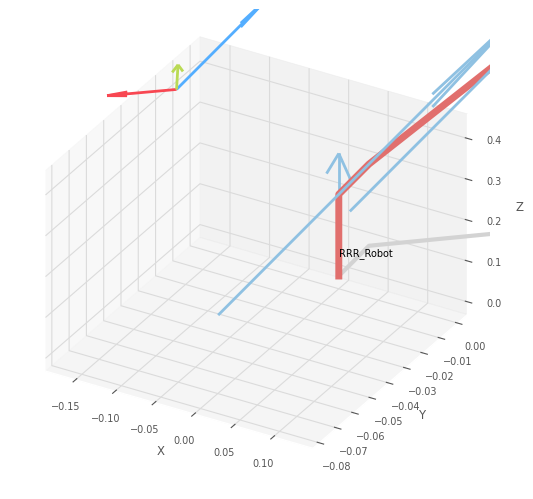

Solution 14: [-1.58989744  0.55342256 -2.2638292 ]


<Figure size 640x480 with 0 Axes>

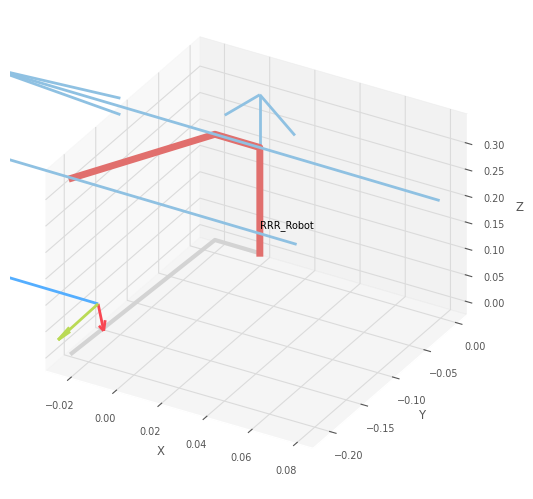

Solution 15: [ 1.21112921  2.64303199 -1.36305445]


<Figure size 640x480 with 0 Axes>

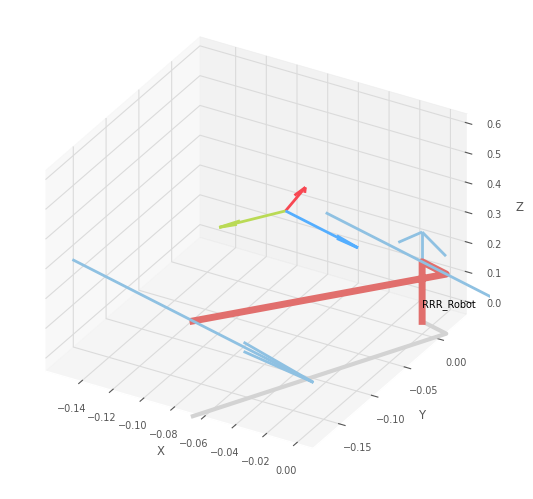

Solution 16: [-1.82085458  2.97754026  2.04892553]


<Figure size 640x480 with 0 Axes>

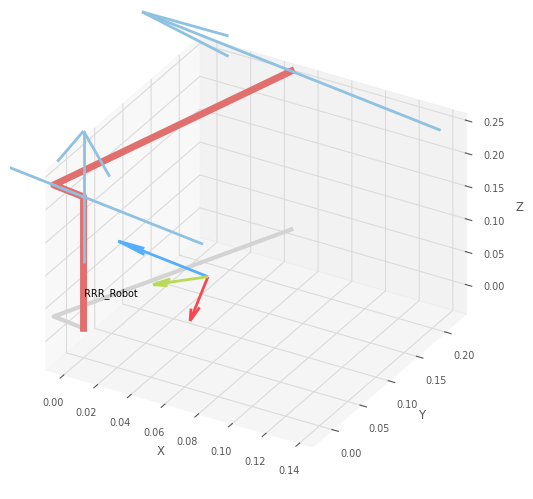

Solution 17: [-1.64355722  2.39683584  0.32604601]


<Figure size 640x480 with 0 Axes>

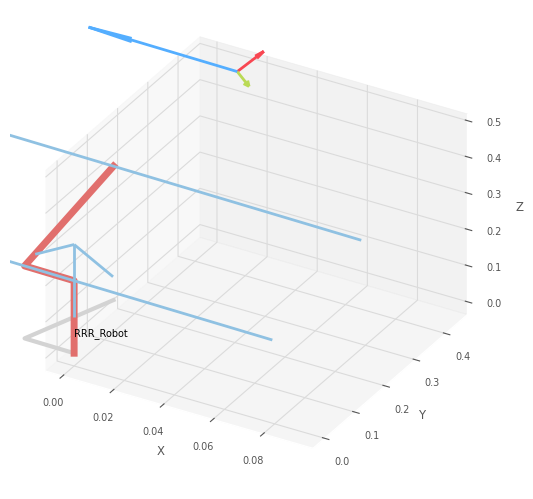

Solution 18: [-0.41152499 -0.42675027 -2.41728067]


<Figure size 640x480 with 0 Axes>

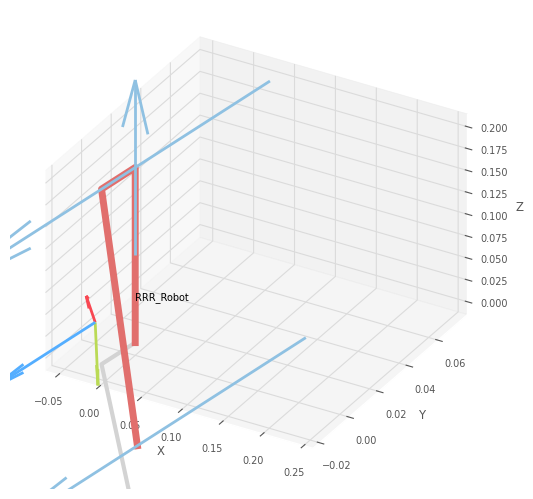

Solution 19: [-1.85885613  2.22866892  0.7936373 ]


<Figure size 640x480 with 0 Axes>

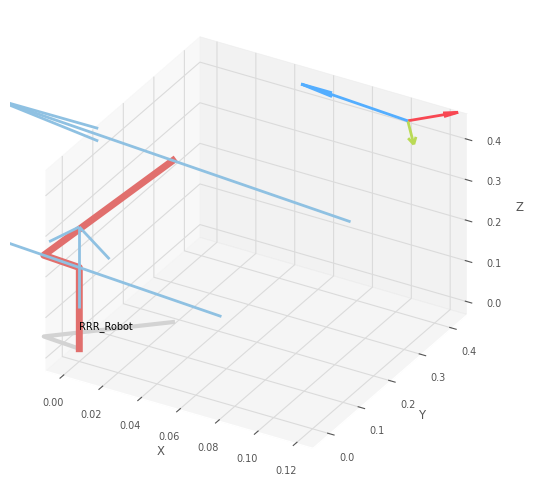

Solution 20: [-2.15972036 -0.47544792  0.52822573]


<Figure size 640x480 with 0 Axes>

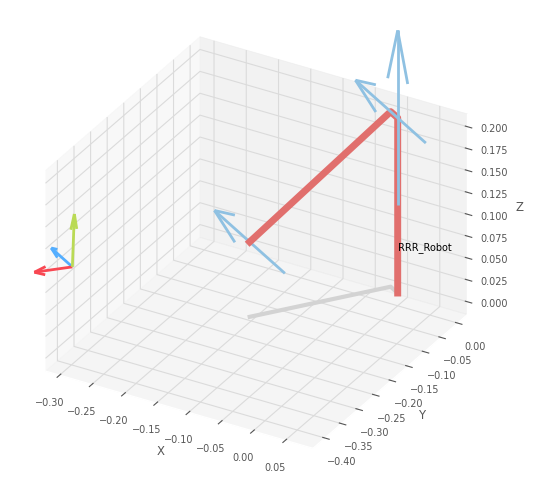

Solution 21: [-1.72896598 -2.96665018 -2.77803855]


<Figure size 640x480 with 0 Axes>

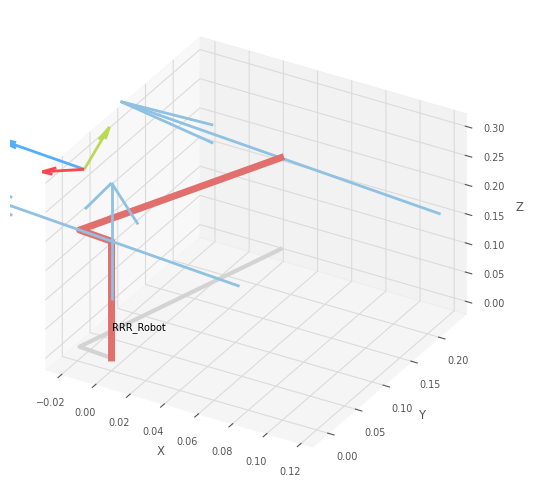

Solution 22: [-0.38989324  0.77604305  1.54745473]


<Figure size 640x480 with 0 Axes>

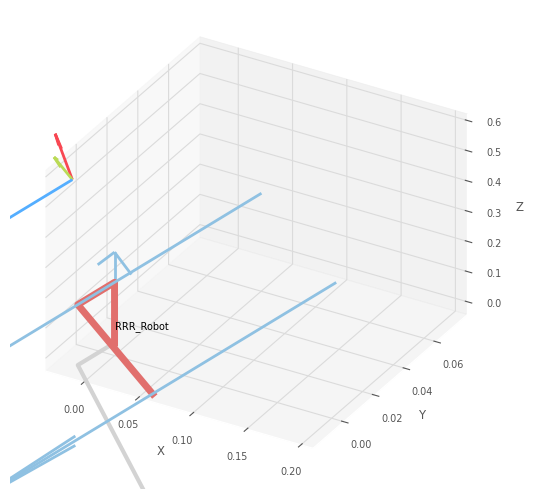

Solution 23: [ 0.70075883  1.08959563 -1.44091043]


<Figure size 640x480 with 0 Axes>

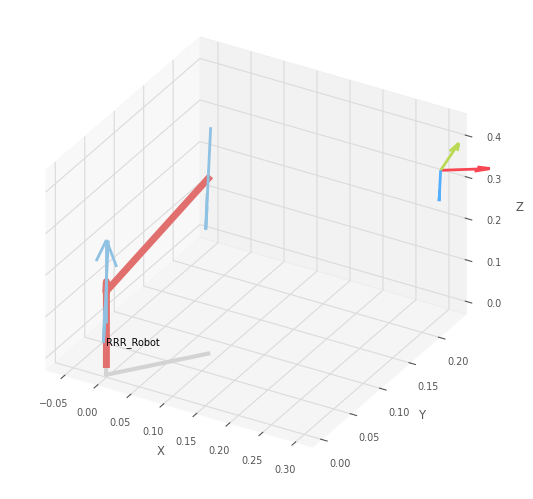

Solution 24: [-1.42438481  2.23631698  1.02940639]


<Figure size 640x480 with 0 Axes>

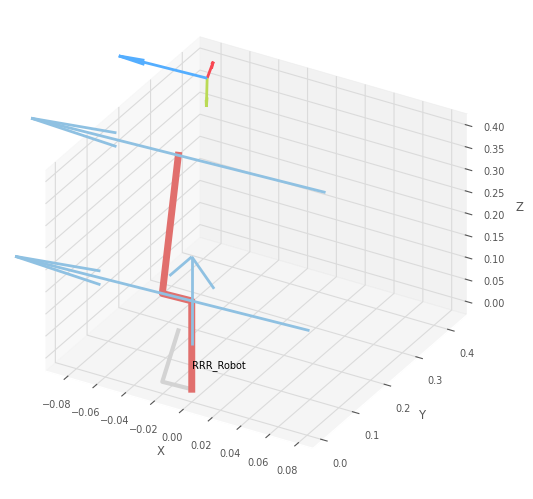

Solution 25: [-2.35918271  0.19863582  1.57670141]


<Figure size 640x480 with 0 Axes>

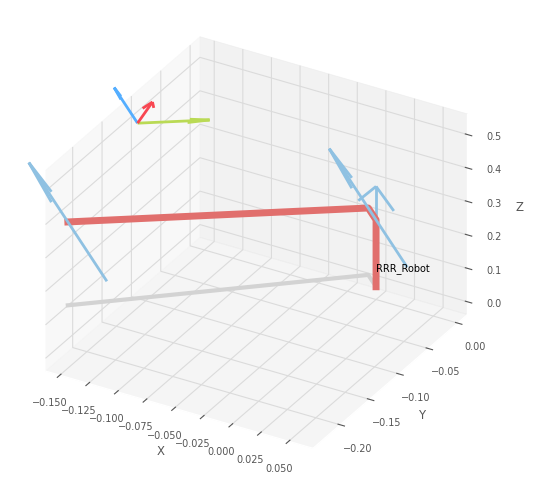

Solution 26: [-0.39302251 -1.48158071  0.20394884]


<Figure size 640x480 with 0 Axes>

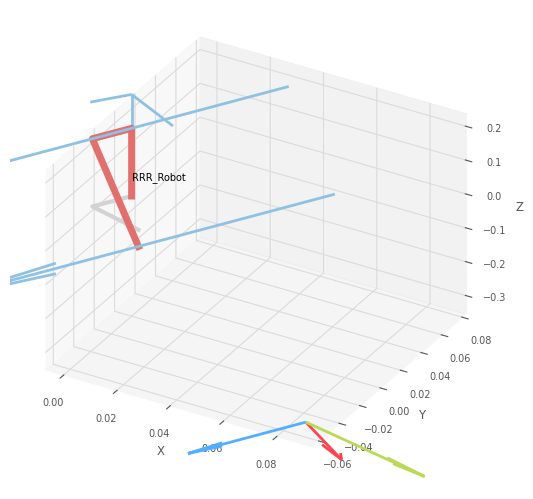

Solution 27: [-2.50451552 -1.85694344  3.06103619]


<Figure size 640x480 with 0 Axes>

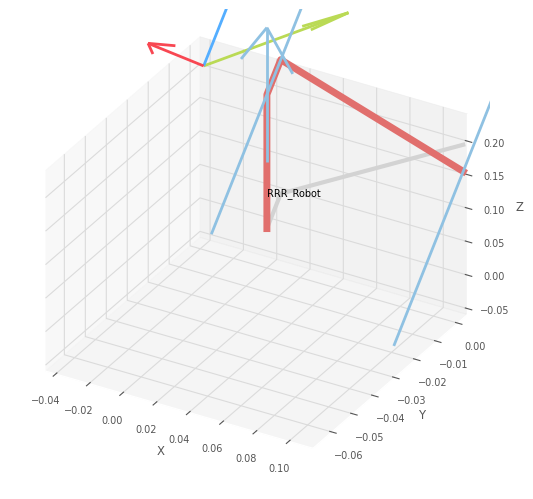

Solution 28: [2.7504223  2.40973029 0.26229598]


<Figure size 640x480 with 0 Axes>

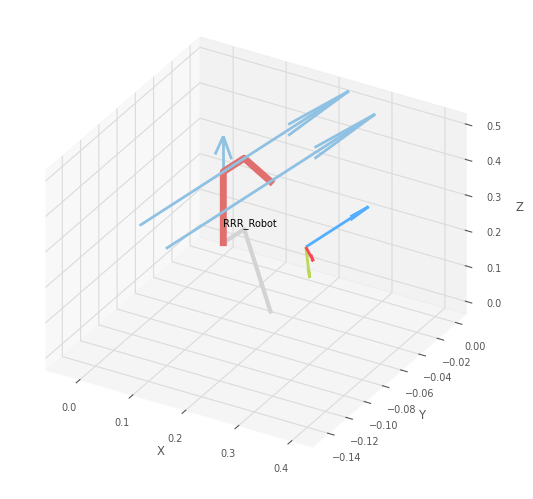

Solution 29: [-2.80040256 -1.76026788 -2.08027432]


<Figure size 640x480 with 0 Axes>

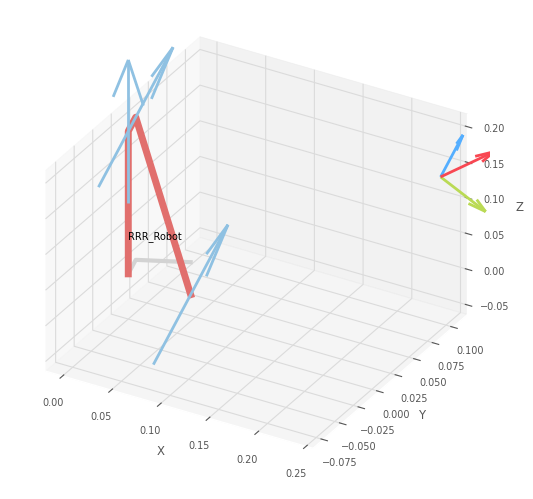

Solution 30: [ 2.06497225  2.56292443 -0.40479267]


<Figure size 640x480 with 0 Axes>

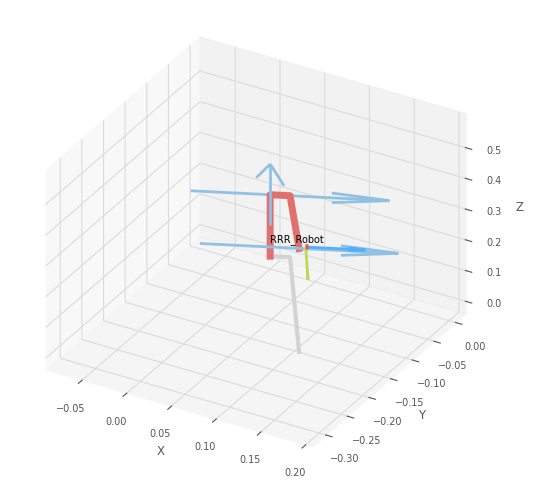

<Figure size 640x480 with 0 Axes>

In [8]:
sol_check = []

# ฟังก์ชันเพื่อตรวจสอบว่าคำตอบใกล้เคียงกันหรือไม่
def are_same_postures(sol1, sol2, threshold=1e-2):
    return np.allclose(sol1, sol2, atol=threshold)

# จัดกลุ่มคำตอบที่ไม่เหมือนกัน
distinct_solutions = []

# ลูปเพื่อคำนวณคำตอบด้วยค่า initial guess ที่แตกต่างกัน
for i in range(30):  # ลองใช้ค่า initial guess ที่แตกต่างกัน 8 ครั้ง
    q_guess = np.random.uniform(low=-pi, high=pi, size=(robot.n,))  # สุ่มค่า initial guess ภายในช่วง -pi ถึง pi
    q_sol = robot.ik_LM(ikT_0e, q_guess)[0]  # คำนวณ IK โดยใช้ค่า initial guess ใหม่
    
    if q_sol is not None:  # ตรวจสอบว่าคำตอบไม่เป็น None
        if isinstance(q_sol, (list, np.ndarray)) and len(q_sol) == robot.n:  # ตรวจสอบขนาดของคำตอบ
            if not any(are_same_postures(q_sol, existing_sol) for existing_sol in distinct_solutions):
                distinct_solutions.append(q_sol)
        else:
            print(f"Invalid or incomplete solution: {q_sol}")
    else:
        print(f"No solution found for initial guess {i+1}")

# แสดงผลคำตอบที่จัดกลุ่มแล้ว
for i, sol in enumerate(distinct_solutions):
    print(f"Solution {i+1}: {sol}")
    sol_check.append(sol)
    robot.plot(sol)  # Plot คำตอบแต่ละท่าทาง

##### 3.3. จงแสดงให้เห็นว่าการหมุนข้อต่อที่ตอบมาในข้อ 3.2. เป็นคำตอบที่ถูกต้อง

In [9]:
# print(sol_check)
# ลูปเพื่อนำ sol_check มาหาค่า Forward Kinematics
for i, sol in enumerate(sol_check):
    fk_result = robot.fkine(sol)  # หาค่า Forward Kinematics จากค่า joint angles
    
    print(f"Forward Kinematics for Solution {i+1}:")
    print(fk_result)  # แสดงผลลัพธ์ของ Forward Kinematics
    
    # ถ้าต้องการแสดงผลการ Plot ของตำแหน่งปลายแขนกล
    # robot.plot(sol)


Forward Kinematics for Solution 1:
  -0.08276   0.0172   -0.9964   -0.05376   
  -0.9756    0.2027    0.08453  -0.3972    
   0.2034    0.9791    0         0.4728    
   0         0         0         1         

Forward Kinematics for Solution 2:
  -0.9215    0.3288    0.2067   -0.159     
   0.1947   -0.06946   0.9784    0.05402   
   0.3361    0.9418    0         0.06369   
   0         0         0         1         

Forward Kinematics for Solution 3:
   0.1116    0.6465    0.7547    0.08637   
  -0.1284   -0.7437    0.6561   -0.06886   
   0.9854   -0.1701    0         0.7184    
   0         0         0         1         

Forward Kinematics for Solution 4:
  -0.7549    0.3517   -0.5536   -0.0177    
  -0.5018    0.2337    0.8328    0.01225   
   0.4223    0.9065    0         0.2729    
   0         0         0         1         

Forward Kinematics for Solution 5:
   0.2213    0.5195   -0.8253    0.08759   
  -0.3234   -0.7593   -0.5647   -0.1634    
  -0.92      0.3919    0     

จากการนำ configulation space จากคำตอบในทุกๆ solution นำมาหา forward kinematic จะได้ตำแหน่ง task space เดียวกันหรือใกล้เคียงกันมากๆ

## 4. Workspace

##### 4.1. จงแสดงให้เห็น Workspace ของหุ่นยนต์

Max Radius: 0.7294987304567765
Min Radius: 0.03152356441013133


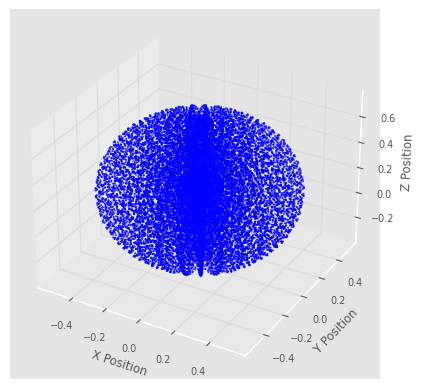

In [10]:
import matplotlib.pyplot as plt

# กำหนดขอบเขตของมุมข้อต่อแต่ละข้อ
q_min = np.array([-np.pi, -np.pi, -np.pi, -np.pi, -np.pi, -np.pi])  # ค่า min ของมุมข้อต่อแต่ละข้อ
q_max = np.array([np.pi, np.pi, np.pi, np.pi, np.pi, np.pi])  # ค่า max ของมุมข้อต่อแต่ละข้อ

# กำหนดจำนวนจุดที่ต้องการ sample ในแต่ละข้อต่อ
num_samples = 30  # จำนวนตัวอย่างต่อข้อต่อ

# สร้าง grid ของมุมข้อต่อแต่ละข้อ
q_samples = [np.linspace(q_min[i], q_max[i], num_samples) for i in range(robot.n)]

# เตรียม arrays เพื่อเก็บตำแหน่ง (position) ของแต่ละคำตอบ
x_positions = []
y_positions = []
z_positions = []

# ลูปหาค่า q จาก grid และคำนวณ Forward Kinematics
for q1 in q_samples[0]:
    for q2 in q_samples[1]:
        for q3 in q_samples[2]:
                        q = [q1, q2, q3]  # มุมข้อต่อปัจจุบัน
                        T_0e = robot.fkine(q)  # คำนวณ Forward Kinematics
                        pos = T_0e.t  # ตำแหน่ง (x, y, z) ของปลายแขนกล
                        x_positions.append(pos[0])
                        y_positions.append(pos[1])
                        z_positions.append(pos[2])

# แปลงข้อมูลเป็น numpy arrays เพื่อใช้ในการ plot
x_positions = np.array(x_positions)
y_positions = np.array(y_positions)
z_positions = np.array(z_positions)

# คำนวณรัศมี (radius) สำหรับแต่ละจุดใน workspace
radii = np.sqrt(x_positions**2 + y_positions**2 + z_positions**2)

# คำนวณค่า max radius และ min radius
max_radius = np.max(radii)
min_radius = np.min(radii)

print(f"Max Radius: {max_radius}")
print(f"Min Radius: {min_radius}")

# Plot workspace ของหุ่นยนต์
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_positions, y_positions, z_positions, c='b', marker='o', s=1)

# ตั้งค่าชื่อแกน
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')

# แสดงผล plot
plt.show()


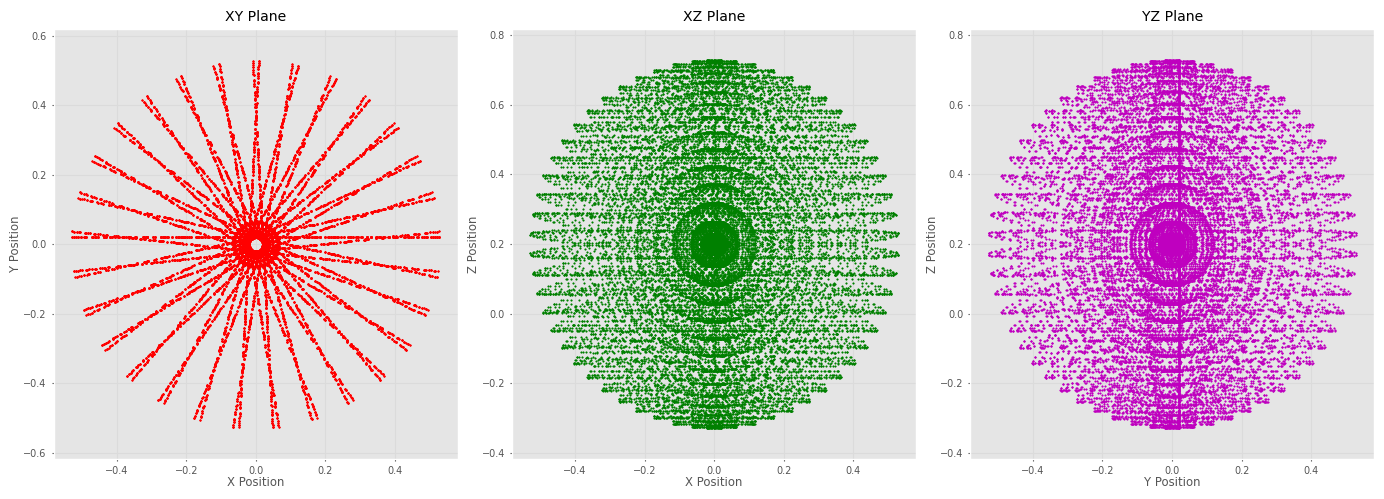

In [11]:
fig = plt.figure(figsize=(18, 5))

# แกน XY
ax2 = fig.add_subplot(142)
ax2.scatter(x_positions, y_positions, c='r', marker='o', s=1)
ax2.set_title('XY Plane')
ax2.set_xlabel('X Position')
ax2.set_ylabel('Y Position')
ax2.axis('equal')

# แกน XZ
ax3 = fig.add_subplot(143)
ax3.scatter(x_positions, z_positions, c='g', marker='o', s=1)
ax3.set_title('XZ Plane')
ax3.set_xlabel('X Position')
ax3.set_ylabel('Z Position')
ax3.axis('equal')

# แกน YZ
ax4 = fig.add_subplot(144)
ax4.scatter(y_positions, z_positions, c='m', marker='o', s=1)
ax4.set_title('YZ Plane')
ax4.set_xlabel('Y Position')
ax4.set_ylabel('Z Position')
ax4.axis('equal')

# แสดงผล plot
plt.tight_layout()

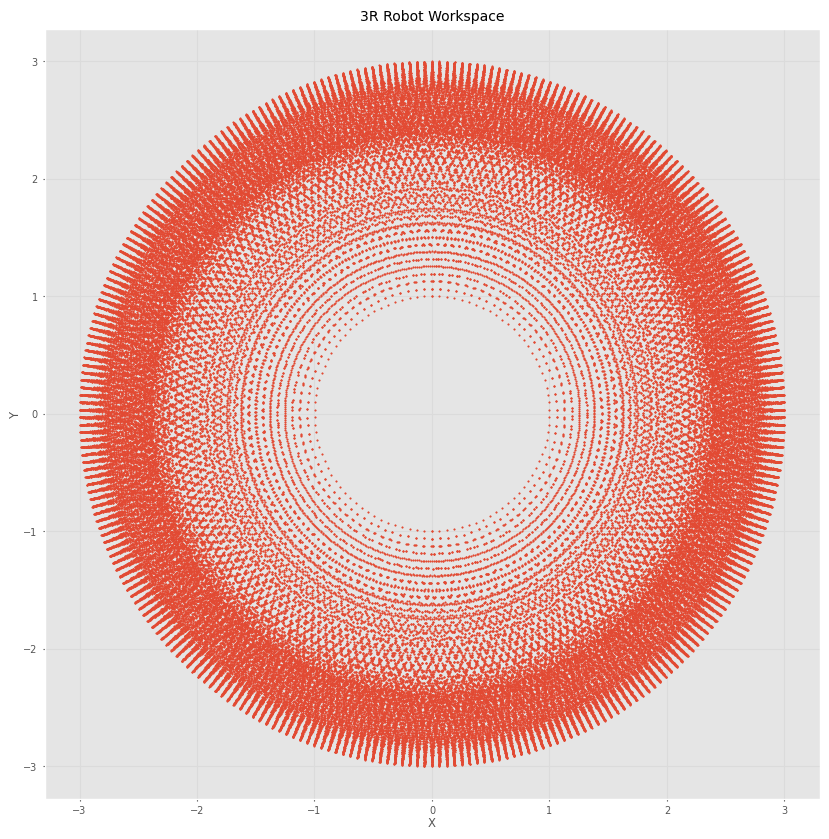

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def forward_kinematics(theta1, theta2, theta3, l1, l2, l3):
    x = l1 * np.cos(theta1) + l2 * np.cos(theta1 + theta2) + l3 * np.cos(theta1 + theta2 + theta3)
    y = l1 * np.sin(theta1) + l2 * np.sin(theta1 + theta2) + l3 * np.sin(theta1 + theta2 + theta3)
    z = 0  # Assuming planar 3R robot for simplicity
    return x, y, z

# Robot parameters
l1, l2, l3 = 1, 1, 1  # Link lengths

# Generate points in the workspace
theta1_range = np.linspace(0, 2*np.pi, 50)
theta2_range = np.linspace(-np.pi/2, np.pi/2, 50)
theta3_range = np.linspace(-np.pi/2, np.pi/2, 50)

x_points, y_points = [], []

for theta1 in theta1_range:
    for theta2 in theta2_range:
        for theta3 in theta3_range:
            x, y, _ = forward_kinematics(theta1, theta2, theta3, l1, l2, l3)
            x_points.append(x)
            y_points.append(y)

# Plot the workspace
plt.figure(figsize=(10, 10))
plt.scatter(x_points, y_points, s=1)
plt.title('3R Robot Workspace')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.grid(True)
plt.show()